In [1]:
from math import *
import numpy as np
# from scipy.optimize import fsolve
import matplotlib
import matplotlib.pyplot as plt
from beambending import Beam, PointLoadV

print("Sucess!")

Sucess!


In [2]:
lbf_to_n = 4.44822162 # [lbf to N]

In [3]:
# Question1

F = 75 # [lbf]
n = 600 # [rpm]
dia = 0.5 # [in]

L = 0.5

PV = F/(L*dia) * (pi*dia*n)/12

# Add the factor of safety
PV *= 2

print("PV = %0.4f [psi*fpm]" % PV)

T_inf = 70 # [f]
fs = 0.05
h_CR = 2.7 # [BTU/(hr*ft*F)]
J = 778 # [ft*lbf/BTU]

Tf = T_inf + (720 * fs * F * n)/(J * h_CR * L)

print("Tf = %0.4f [F]" % Tf)

PV = 47123.8898 [psi*fpm]
Tf = 1612.4165 [F]


In [4]:
# Question2

w = 0.002 # [in]
t = 1000 # [hr]
n = 200 # [rpm]
F = 100 # [lbf]
dia = 1.25 # [in]
T_amb = 70 # [F]
FoS = 2
fs = 0.03
J = 778
h_CR = 2.7
T_max = 300

# Guess L = 1 for now
L = 1
P = F/(dia*L)
print("P = %0.4f [psi]" % P)
V = (pi*dia*n)/12
print("V = %0.4f [fpm]" % V)
f1 = 1.8

f2 = 1
k = 0.6*(10**(-10))

L = (f1 * f2 * k * FoS * F * n * t) / (3 * w)
print("L based on wear: %0.4f [in]" % L)

L = (720 * fs * FoS * F * n) / (J * h_CR * (T_max - T_amb))
print("L based on temperature: %0.4f [in]" % L)



P = 80.0000 [psi]
V = 65.4498 [fpm]
L based on wear: 0.7200 [in]
L based on temperature: 1.7883 [in]


In [5]:
# Question3

af = 1.4
F_D = 725 # [lbf]
theta = 4.459
x0 = 0.02
a = 3
b = 1.483

x_D = 1248

C10 = af * F_D * (x_D / (x0 + (theta - x0) * (1 - 0.9)**(1/1.483)))**(1/3)
C10 *= (lbf_to_n / 1000)
print("C10 = %0.4f [kN]" % C10)

C10 = 55.9E3

temp = (af * (F_D*lbf_to_n) / C10)**a

R = exp(-(((x_D*temp - x0)/(theta - x0)))**b)
print("R = %0.4f []" % R)

C10 = 49.2814 [kN]
R = 0.9453 []


In [6]:
# Question6

P_d = 8
num_teeth = 24
phi_t = 20
n = 480
hp_gear = 5

dia_gear = num_teeth / P_d
print("dia_gear = %0.4f [in]" % dia_gear)
vel_gear = (dia_gear * n * pi) / 12
print("vel_gear = %0.4f [fpm]" % vel_gear)
torque_gear = (63025 * hp_gear) / n
print("torque_gear = %0.4f [lbf*in]" % torque_gear)
W_t = 33000 * (hp_gear / vel_gear)
print("W_t = %0.4f [lbf]" % W_t)
W_r = W_t * tan(radians(phi_t))
print("W_r = %0.4f [lbf]" % W_r)


# Compute force from sprocket
dia_sprocket = 10 # [in]
hp_sprocket = 11 # [hp]

torque_sprocket = (63025 * hp_sprocket) / n
print("\ntorque_sprocket = %0.4f [lbf*in]" % torque_sprocket)

force_sprocket = torque_sprocket / (dia_sprocket/2)
print("force_sprocket = %0.4f [lbf]" % force_sprocket)


# Compute force from first V-belt
dia_v1 = dia_v2 = 4 # [in]
hp_v1 = hp_v2 = 3
torque_v1 = torque_v = (63025 * hp_v1) / n
print("\ntorque_v = %0.4f [lbf*in]" % torque_v1)

force_v1 = force_v = (3/2) * (torque_v1 / (dia_v1/2))
print("force_v = %0.4f [lbf]" % force_v1)


# Resolve the reactions
F_y = (1/24) * ((4*W_t) - (10*force_sprocket*sin(radians(15))) + (20*force_v*cos(radians(30))))
A_y = (1/24) * ((20*W_t) - (14*force_sprocket*sin(radians(15))) + (4*force_v*cos(radians(30))))

F_z = (1/24) * ((4*W_r) - (10*force_sprocket*cos(radians(15))) + (16*force_v) + (20*force_v*sin(radians(30))))
A_z = (1/24) * ((20*W_r) - (14*force_sprocket*cos(radians(15))) + (8*force_v) + (4*force_v*sin(radians(30))))

print("\nA_y = %0.4f [lbf]" % A_y)
print("A_z = %0.4f [lbf]" % A_z)
print("F_y = %0.4f [lbf]" % F_y)
print("F_z = %0.4f [lbf]" % F_z)


dia_gear = 3.0000 [in]
vel_gear = 376.9911 [fpm]
torque_gear = 656.5104 [lbf*in]
W_t = 437.6761 [lbf]
W_r = 159.3011 [lbf]

torque_sprocket = 1444.3229 [lbf*in]
force_sprocket = 288.8646 [lbf]

torque_v = 393.9062 [lbf*in]
force_v = 295.4297 [lbf]

A_y = 363.7595 [lbf]
A_z = 93.0839 [lbf]
F_y = 255.0025 [lbf]
F_z = 230.3399 [lbf]


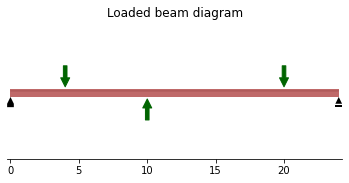

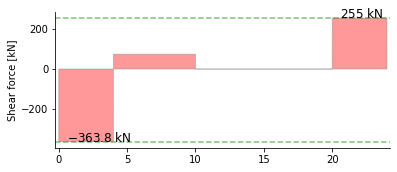

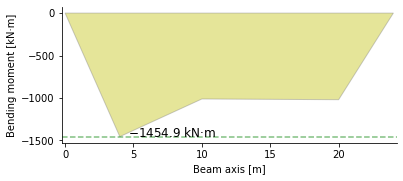

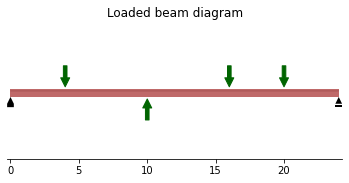

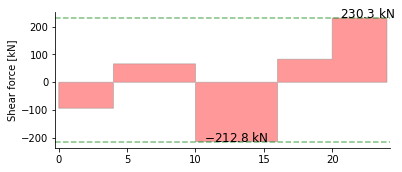

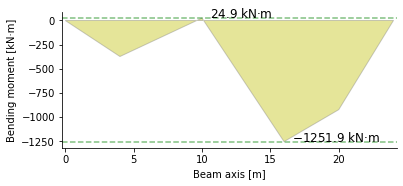

In [7]:
# Question6 (plotting V, M diagram)

# Make the shear and moment diagrams

# Setup the xy beam
beamXY = Beam(24)  # Initialize a Beam object of length 24in
beamXY.pinned_support = 0    # x-coordinate of the pinned support
beamXY.rolling_support = 24  # x-coordinate of the rolling support

# Add loads to the xy beam
beamXY.add_loads((
    
    PointLoadV(-W_t, 4), # loadVal, xVal
    PointLoadV((force_sprocket*sin(radians(15))), 10),
    PointLoadV((-force_v*cos(radians(30))), 20),
    
))

fig = beamXY.plot_beam_diagram()
fig = beamXY.plot_shear_force()
fig = beamXY.plot_bending_moment()


# Setup the xz beam
beamXZ = Beam(24)  # Initialize a Beam object of length 24in
beamXZ.pinned_support = 0    # x-coordinate of the pinned support
beamXZ.rolling_support = 24  # x-coordinate of the rolling support

# Add loads to the xz beam
beamXZ.add_loads((
    
    PointLoadV(-W_r, 4), # loadVal, xVal
    PointLoadV((force_sprocket*cos(radians(15))), 10),
    PointLoadV(-force_v, 16),
    PointLoadV((-force_v*sin(radians(30))), 20),
    
))

fig1 = beamXZ.plot_beam_diagram()
fig1 = beamXZ.plot_shear_force()
fig1 = beamXZ.plot_bending_moment()


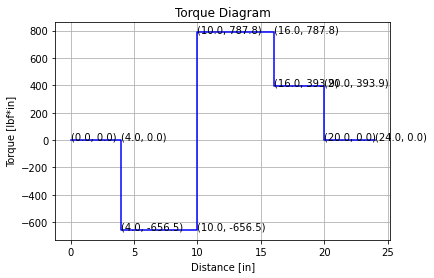

In [8]:
# Question6 (plotting T diagram)

# Do the torque plot
torque_xVals = np.array([0, 4, 4, 10, 10, 16, 16, 20, 20, 24])
torque_yVals = np.array([0, 0, -torque_gear, -torque_gear, torque_sprocket - torque_gear, \
                         torque_sprocket - torque_gear, torque_v, torque_v, 0, 0])

fig, ax = plt.subplots()
ax.plot(torque_xVals, torque_yVals, 'b-')

for xy in zip(torque_xVals, torque_yVals):
    ax.annotate('(%0.1f, %0.1f)' % xy, xy=xy, textcoords='data')
    
plt.title("Torque Diagram")
plt.xlabel("Distance [in]")
plt.ylabel("Torque [lbf*in]")
plt.grid(True)

In [9]:
# Compute shaft diameters

s_u = 87 # [ksi]
s_y = 60E3 # [psi]

s_n = 0.5 * s_u # [ksi]
print("s_n = %0.4f [ksi]" % s_n)

c_m = 1
c_st = 1
c_r = 0.81
c_s = 0.8

s_n_prime = s_n * c_m * c_st * c_r * c_s
s_n_prime *= 1E3
print("s_n_prime = %0.4f [ksi]" % (s_n_prime/1E3))


N = 2.5
k_t = 3

# Compute spur gear minimum shaft diameter
M = 1501.94
T = torque_gear
dia_spur_shaft = ((32*N/pi) * (sqrt((k_t*M)/s_n_prime)**2 + (3/4)*(T/s_y)**2))**(1/3)
print("\ndia_spur_shaft = %0.4f [in]" % dia_spur_shaft)


# Compute sprocket minimum shaft diameter
M = 1011.82
T = torque_sprocket
dia_sprocket_shaft = ((32*N/pi) * (sqrt((k_t*M)/s_n_prime)**2 + (3/4)*(T/s_y)**2))**(1/3)
print("dia_sprocket_shaft = %0.4f [in]" % dia_sprocket_shaft)


# Compute sheave at D minimum shaft diameter
M = 1612.24
T = torque_v
dia_sheave1_shaft = ((32*N/pi) * (sqrt((k_t*M)/s_n_prime)**2 + (3/4)*(T/s_y)**2))**(1/3)
print("dia_sheave1_shaft = %0.4f [in]" % dia_sheave1_shaft)


# Compute sheave at D minimum shaft diameter
M = 1374.11
T = torque_v
dia_sheave2_shaft = ((32*N/pi) * (sqrt((k_t*M)/s_n_prime)**2 + (3/4)*(T/s_y)**2))**(1/3)
print("dia_sheave2_shaft = %0.4f [in]" % dia_sheave2_shaft)

s_n = 43.5000 [ksi]
s_n_prime = 28.1880 [ksi]

dia_spur_shaft = 1.5970 [in]
dia_sprocket_shaft = 1.4016 [in]
dia_sheave1_shaft = 1.6349 [in]
dia_sheave2_shaft = 1.5501 [in]


In [10]:
# Compute required keys

# Figure out material parmeters
yield_strength_4140 = 90E3 # [psi]
tau_d = 0.577 * yield_strength_4140
print("tau_d = %0.4f [ksi]" % (tau_d/1E3))

# For 1.75 in shaft, key w = h = 0.5
W_key = H_key = 0.5

# Compute for spur gear (shear, compression)
print("\nSpur gear key:")
L_min_shear = (2*torque_gear) / (tau_d * 1.75 * W_key)
L_min_compression = (4*torque_gear) / (yield_strength_4140 * 1.75 * H_key)
print("L_min_shear = %0.4f [in]" % L_min_shear)
print("L_min_compression = %0.4f [in]" % L_min_compression)

# Compute for sprocket (shear, compression)
print("\nSprocket key:")
L_min_shear = (2*torque_sprocket) / (tau_d * 1.75 * W_key)
L_min_compression = (4*torque_sprocket) / (yield_strength_4140 * 1.75 * H_key)
print("L_min_shear = %0.4f [in]" % L_min_shear)
print("L_min_compression = %0.4f [in]" % L_min_compression)

# Compute for sheave (shear, compression)
print("\nSheave1 = Sheave2 key:")
L_min_shear = (2*torque_v) / (tau_d * 1.75 * W_key)
L_min_compression = (4*torque_v) / (yield_strength_4140 * 1.75 * H_key)
print("L_min_shear = %0.4f [in]" % L_min_shear)
print("L_min_compression = %0.4f [in]" % L_min_compression)


tau_d = 51.9300 [ksi]

Spur gear key:
L_min_shear = 0.0289 [in]
L_min_compression = 0.0333 [in]

Sprocket key:
L_min_shear = 0.0636 [in]
L_min_compression = 0.0734 [in]

Sheave1 = Sheave2 key:
L_min_shear = 0.0173 [in]
L_min_compression = 0.0200 [in]


In [11]:
# Compute the required bearings

magnitude_A = sqrt(A_y**2 + A_z**2)
magnitude_F = sqrt(F_y**2 + F_z**2)
print("magnitude_A = %0.4f [lbf]" % magnitude_A)
print("magnitude_F = %0.4f [lbf]" % magnitude_F)

L_D = 9600 * 60 * n
L_10 = 1E6

# x_D = (60 * L_D * n) / L_10
# print("x_D = %0.4f [?]" % x_D)

# # Weibull parameters
# theta = 4.459
# x_0 = 0.02
# b = 1.483

a = k = 3
# a_f = 1
# F_D = magnitude_A

# # Compute C10 for bearing A
# C_10 = (a_f * F_D) * (x_D / (x_0 + (theta - x_0)*(1 - 0.9)**(1/b)))**(1/a)
# print("C_10 = %0.4f [lbf]" % C_10)
# print("C_10 = %0.4f [kN]" % (C_10*lbf_to_n/1E3))


# Compute for bearing A
P_1 = magnitude_A * (L_D/L_10)**(1/k)
print("P_1_A = %0.4f [lbf]" % P_1)


# Compute for bearing F
P_1 = magnitude_F * (L_D/L_10)**(1/k)
print("P_1_F = %0.4f [lbf]" % P_1)


magnitude_A = 375.4805 [lbf]
magnitude_F = 343.6317 [lbf]
P_1_A = 2446.1063 [lbf]
P_1_F = 2238.6240 [lbf]
